# Qiskit Bootcamp Challenge 2025!!

Welcome to the Qiskit v2.x! This notebook is designed to challenge you on the previously provided content and also covers some new content to keep it interesting.

For more detailed information, please refer to the official Qiskit documentation.

**Instructions:**
1. Read the explanation for each concept.
2. Complete the coding exercise in the designated cell.

## Setup

First, let's install and import the necessary libraries. Run the cell below.

In [2]:
!pip install qiskit[visualization] qiskit-ibm-runtime qiskit-aer qiskit_qasm3_import

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=69a179bbcfc32e343cc41db0f32a4bffe40b94828a1eaf127c6ab91dedc25619
  Stored in 

---

## 1. Pauli Operators (Single-Qubit Operators)

**Explanation:** The Pauli operators (X, Y, Z, and I) are 2x2 matrices that represent fundamental single-qubit quantum operations. In Qiskit, these can be created using the `Pauli` class (e.g., `Pauli('X')` for the X operator). You can also construct multi-qubit Paulis by specifying characters for each qubit (e.g., `'XI'` for identity on qubit 0 and X on qubit 1, following Qiskit's little-endian bit ordering).

**Exercise 1:**
Write code that performs following functionality:
1. Creates a 3-qubit Pauli operator representing `Z` on qubit 2, `Y` on qubit 1, and `I` (Identity) on qubit 0.
2. Prints the operator.
3. Prints its corresponding matrix representation

In [3]:
# Your code here
from qiskit.quantum_info import Pauli
pauli_operator = Pauli('ZYI')
print(pauli_operator)
print(pauli_operator.to_matrix())

ZYI
[[0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j]]


In [4]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.z(2)
qc.y(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ Y ├
     ├───┤
q_2: ┤ Z ├
     └───┘

---

## 2. Single-Qubit Gates and Phases

**Explanation:** Single-qubit gates like X, Y, Z, H, S, and T are basic operations on one qubit. S and T are phase gates. The S-gate adds a π/2 phase to the |1⟩ component of any quantum state, while the T-gate adds a π/4 phase to the |1⟩ component, leaving the |0⟩ component unchanged in both cases. These phase shifts are crucial for many quantum algorithms.

**Exercise 2:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Puts the qubit in the state |1⟩.
3. Adds a single gate to the circuit that applies a π/4 phase shift to the qubit.
4. Output a Dirac notation representation of the circuit's statevector.

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(1)
qc.x(0)
qc.t(0)
statevec = Statevector.from_instruction(qc)
for state, amplitude in statevec.to_dict().items():
    print(f"{amplitude:.3g}|{state}>")



qc.draw()

0.707+0.707j|1>


┌───┐┌───┐
q: ┤ X ├┤ T ├
   └───┘└───┘

---

## 3. Superposition and Bloch Sphere Rotations

**Explanation:** Gates like `RX`, `RY`, and `RZ` perform rotations around the axes of the Bloch sphere, creating superposition states. A rotation by an angle θ around the Y-axis (`RY(θ)`) on an initial state |0⟩ produces the superposition cos(θ/2)|0⟩ + sin(θ/2)|1⟩. The probabilities of measuring 0 or 1 are the squares of these amplitudes.

**Exercise 3:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Applies a single gate to qubit 0 (initially in state |0⟩) to create a superposition where the probability of measuring |0⟩ is approximately 14.6% and the probability of measuring |1⟩ is 85.4%.
3. Prints the probabilities.
4. Displays a Bloch sphere representation of the statevector.

Probability of ket 0: 0.146
Probability of ket 1: 0.854


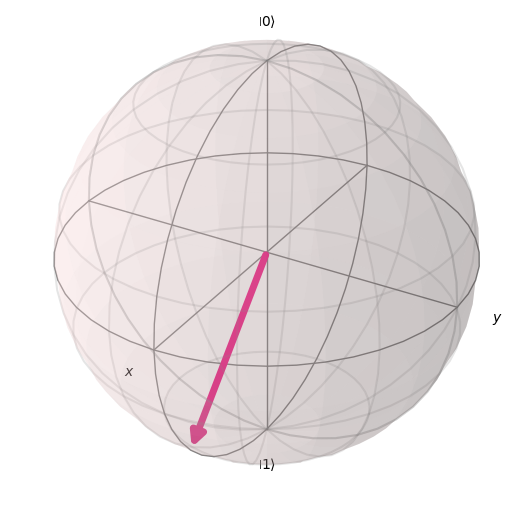

In [13]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np

theta = 2 * np.arccos(np.sqrt(0.146))
qc = QuantumCircuit(1)
qc.ry(theta, 0)
statevec = Statevector.from_instruction(qc)
probs = statevec.probabilities_dict()
print("Probability of ket 0:", probs['0'])
print("Probability of ket 1:", probs['1'])

bloch = statevec.data
from qiskit.quantum_info import Pauli

bloch_vector = [
    statevec.expectation_value(Pauli('X')),
    statevec.expectation_value(Pauli('Y')),
    statevec.expectation_value(Pauli('Z'))
]
plot_bloch_vector(bloch_vector)


---

## 4. Multi-Qubit Operations and Entanglement

**Explanation:** Multi-qubit gates like the CNOT (`qc.cx(control, target)`) create entanglement when applied to superposition states. A common entangled state is the Bell state |Φ+⟩ = 1/√2(|00⟩ + |11⟩), created by applying a Hadamard gate to one qubit and then a CNOT gate. Remember Qiskit's bit ordering: qubit 0 is the rightmost bit (least significant).

**Exercise 4:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains two qubits.
2. Create the Bell state |Φ+⟩ in which the first qubit (q0) is the control qubit.
3. Draws the quantum circuit using matplotlib.
4. Prints the circuit's statevector.

Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


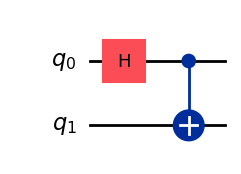

In [20]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
statevec = Statevector.from_instruction(qc)
print("Statevector:", statevec)

qc.draw('mpl')


---

## 5. Building Quantum Circuits and Drawing

**Explanation:** The `QuantumCircuit` class is used to build circuits. The `draw()` method provides visualizations in formats like `'text'`, `'mpl'`, and `'latex'`. You can customize the drawing with parameters such as `reverse_bits` to flip the qubit order.

**Exercise 5:**
Write code that performs following functionality:
1. Creates a 3-qubit GHZ state.
2. Draws the circuit with the qubit order reversed in the diagram (q2 on top, q0 on bottom).


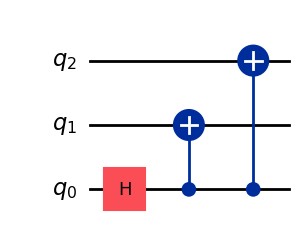

In [21]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.draw(output='mpl', reverse_bits=True)

---

## 6. Dynamic Circuits and Classical Control Flow

**Explanation:** Qiskit supports dynamic circuits where operations can be conditioned on classical measurement outcomes. The `if_test()` context manager can be used to create conditional blocks where operations are executed based on classical bit values. This allows for powerful classical feed-forward in your quantum programs.

**Exercise 6:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains two qubits and at least one classical bit.
2. Adds a hadamard gate to the least significant qubit
3. Applies an X gate to qubit 1 *only if* a measurement of qubit 0 yields the result `1`. Use the `if_test()` context manager with the appropriate condition tuple.
4. Draws the circuit using matplotlib.

Your Qiskit version does not support if_test. Please use a recent version (Terra >= 0.25) or see the fallback method below.


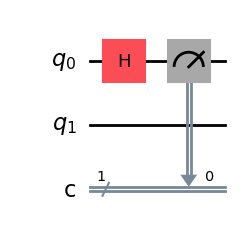

In [37]:
from qiskit import QuantumCircuit, ClassicalRegister

qc = QuantumCircuit(2,1)
qc.h(0)
qc.measure(0,0)
try:
    from qiskit.circuit.controlflow import if_test
    with if_test((qc.cregs[0], 1)):
        qc.x(1)
except ImportError:
    print("Your Qiskit version does not support if_test. Please use a recent version (Terra >= 0.25) or see the fallback method below.")

qc.draw(output='mpl')


---

## 7. Visualizing Quantum States and Results

**Explanation:** Qiskit offers several functions to visualize results. `plot_histogram(counts)` is used to display measurement outcomes from a simulation or real device run. You can sort the results for easier analysis, for example, by the frequency of the outcomes.

**Exercise 7:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Measures the results on classical wires.
3. Runs the circuit using the `AerSimulator`.
4. Gets the measurement counts.
5. Plots a histogram with the bars sorted from the most common outcome to the least common.

Raw measurement counts: {'11': 494, '00': 530}


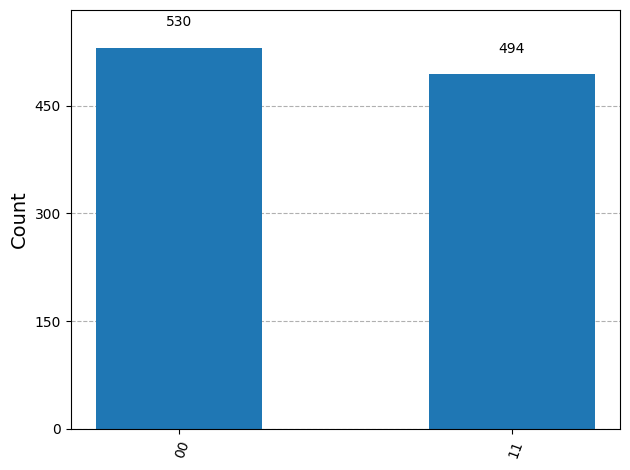

In [40]:
from qiskit import QuantumCircuit, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.measure_all()
sim = AerSimulator()
compiled_circuit = transpile(qc, sim)

result = sim.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()
print("Raw measurement counts:", counts)

sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))

plot_histogram(sorted_counts)

---

## 8. Parameterized Quantum Circuits

**Explanation (Parameter):** Qiskit allows circuits with symbolic parameters using the `Parameter` class. These parameters act as placeholders that can be bound to specific numerical values later using the `assign_parameters()` method. This is fundamental for variational algorithms like VQE and QAOA.

**Explanation (ParameterVector):**

While `Parameter` is good for a single value, `ParameterVector` is used when you need a group of parameters, like for a variational ansatz. You can create a vector of parameters with a name and a length (e.g., `ParameterVector('p', 3)`), which creates parameters `p[0]`, `p[1]`, and `p[2]`.

**Exercise 8:**
Write code that performs following functionality:
1. Creates a `Parameter` instance to represent a parameter named `theta`.
2. Creates a 1-qubit quantum circuit `qc1`.
3. Adds an RX gate with parameter `theta` to the qubit wire.
4. Creates a `ParameterVector` instance named `p` with a length of 2.
5. Creates a 1-qubit quantum circuit `qc2`.
6. Adds an RZ gate with `p[0]` and an RX gate with `p[1]` to the circuit.
7. Draws both unbound circuits.
8. Creates a new circuit `bound_qc1` by binding `theta` to the value `π/2`.
9. Creates a new circuit `bound_qc2` by binding the `p` vector to the values `[π/4, π/8]`.
10. Draws both bound circuits.

Unbound qc1:
Unbound qc2:
Bound qc1 (theta=π/2):
Bound qc2 (p=[π/4, π/8]):


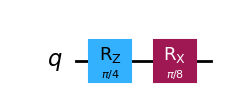

In [42]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector
from numpy import pi

theta = Parameter('theta')

qc1 = QuantumCircuit(1)
qc1.rx(theta, 0)

p = ParameterVector('p', 2)

qc2 = QuantumCircuit(1)
qc2.rz(p[0], 0)
qc2.rx(p[1], 0)

print("Unbound qc1:")
qc1.draw('mpl')
print("Unbound qc2:")
qc2.draw('mpl')

bound_qc1 = qc1.assign_parameters({theta: pi/2})
bound_qc2 = qc2.assign_parameters({p[0]: pi/4, p[1]: pi/8})

print("Bound qc1 (theta=π/2):")
bound_qc1.draw('mpl')
print("Bound qc2 (p=[π/4, π/8]):")
bound_qc2.draw('mpl')


---

## 9. Circuit Transpilation and Optimization

**Explanation:** Transpilation adapts a quantum circuit to the constraints of a specific quantum device, including its basis gates and qubit connectivity. The `generate_preset_pass_manager()` function creates a transpilation pass manager with preset configurations. It has several `optimization_level` settings (0-3), where higher levels apply more advanced optimization techniques to reduce circuit depth and gate count, at the cost of longer compilation time.

**Exercise 9:**
Write code that performs following functionality:
1. Creates a 3-qubit GHZ circuit.
2. Transpiles the circuit for the `FakeVigoV2` backend, using the highest level of optimization (level 3).
3. Prints the depth of the original circuit.
4. Prints the depth of the transpiled circuit.
5. Draws the transpiled circuit.

In [ ]:
# Your code here


---

## 10. Quantum Primitives (Sampler and Estimator)

**Explanation:** Primitives are high-level interfaces for common quantum tasks. The **Sampler** and **Estimator** are two key primitives that each serve different purposes when working with quantum circuits. They abstract away the details of execution and error mitigation, making it easier to extract meaningful information from quantum computations.

**Exercise 10:** This is a conceptual question. In the markdown cell below, describe the fundamental difference between the Sampler and Estimator primitives in a single sentence.

*[Your answer here]*

---

## 11. Using the Sampler Primitive

**Explanation:** In Qiskit 2, you can use the `Sampler` primitive from `qiskit_ibm_runtime` with local simulators like `AerSimulator`. Here you'll initialize a `Sampler` with a backend mode, transpile your circuit using `generate_preset_pass_manager`, then use the `.run([circuits], shots=...)` method. The result object contains measurement data accessible via the classical register names.

**Exercise 11:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Uses the `measure_all` method to measure the results.
3. Transpiles the circuit using the `AerSimulator` backend.
4. Initializes the `Sampler` primitive with the `AerSimulator` backend
5. Runs the Sampler.
6. Gets the measurement counts.
7. Prints the measurement counts.


In [ ]:
# Your code here


---

## 12. Using the Estimator Primitive

**Explanation:** In Qiskit 2, you can use the `Estimator` primitive from `qiskit_ibm_runtime` with local simulators like `AerSimulator`. The `Estimator` computes expectation values ⟨ψ|O|ψ⟩. Here you'll initialize an `Estimator` with a backend mode, transpile your circuit using `generate_preset_pass_manager`, apply the observable to the circuit layout, then use the `.run([(circuit, observable)])` method. The result object contains expectation values accessible via `data.evs`.

**Exercise 12:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Defines the ZZ observable using `SparsePauliOp`
3. Transpiles the circuit using the `AerSimulator` backend.
4. Applies the observable to the circuit layout
5. Initializes the `Estimator` primitive with the `AerSimulator` backend.
6. Runs the Estimator.
4. Gets the PUB result.
5. Retrieves and prints the expectation value.

In [ ]:
# Your code here


---

## 13. Error Mitigation Techniques

**Explanation:** Qiskit provides techniques to reduce the impact of noise on quantum hardware. **Readout error mitigation** corrects for errors in the final measurement step. **Dynamical Decoupling (DD)** inserts pulse sequences during idle times to protect qubits from decoherence. **Zero-Noise Extrapolation (ZNE)** runs circuits at different noise levels and extrapolates the result back to the zero-noise limit.

**Exercise 13:** This is a conceptual question. You are running a circuit on a noisy backend and suspect that the qubits are losing their quantum state (decohering) during idle periods in the circuit. Which error *suppression* technique would be most appropriate to apply?

*[Your answer here]*

---

## 14. OpenQASM 3 Basics

**Explanation:** OpenQASM 3 is the latest version of the quantum assembly language. It has a more expressive syntax than its predecessor. For example, you declare a register of three qubits with `qubit[3] my_qubits;` and a classical bit register with `bit[2] c;`.

**Exercise 14:** Complete the OpenQASM 3 string below to create a Bell state between `q[0]` and `q[1]`.

In [ ]:
qasm3_string = '''
OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
bit[2] c;
// Your code here (2 lines)

c = measure q;
'''

print(qasm3_string)

---

## 15. OpenQASM 3 vs OpenQASM 2 – New Features

**Explanation:** OpenQASM 3 introduced significant improvements over OpenQASM 2, most notably expanding beyond simple gate-based circuits. A major enhancement involves programming constructs that allow quantum programs to make decisions and repeat operations based on classical data and measurement outcomes, enabling more dynamic and adaptive quantum algorithms.

**Exercise 15:**
Write an OpenQASM 3 string that demonstrates classical control flow. The program should:
1. Use a `for` loop to iterate 3 times.
2. Inside the loop, apply a Hadamard gate to qubit 0.
3. *Hint: The syntax is `for i in [0:3] { ... }`*.

*[Your qasm string here]*

---

## 16. Interfacing OpenQASM with Qiskit

**Explanation:** Qiskit provides tools to convert between `QuantumCircuit` objects and OpenQASM 3 strings. To import an OpenQASM 3 string into a Qiskit circuit, you can use the `qiskit.qasm3.loads()` function. To export a circuit, you use `qiskit.qasm3.dumps()`.

**Exercise 16:**
Write Python code to:
1. Take the OpenQASM 3 string (provided in the cell) and convert it into a Qiskit `QuantumCircuit` object named `qc_from_qasm`.
2. Draw the loaded circuit.
3. Create a *new* 3-qubit GHZ state circuit in Qiskit.
4. Convert this *new* GHZ circuit into an OpenQASM 3 string using `qiskit.qasm3.dumps()` and print the resulting string.

In [ ]:
qasm3_string_for_import = '''
OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
bit[2] c;
h q[0];
cx q[0], q[1];
c = measure q;
'''

# Your code here


## Final Challenge: Build Your Own Quantum Circuit

Congratulations on reaching the final challenge! You've now seen all the fundamental building blocks of Qiskit: from creating circuits and adding gates to using the Primitives, handling parameters, and transpiling for a backend.

Your final task is to put all these pieces together. Your challenge is to **design and execute a quantum circuit of your own interest.**

> **There is no single correct answer.** This is your opportunity to be creative and show what you've learned. This challenge is about **50% functionality** and **50% creativity**.

If you're not sure what to build, here are a few ideas:

* Try to build the circuit for Quantum Teleportation (it only uses H, CNOT, X, Z, and measurement!).
* Create a simple variational circuit ("ansatz") using `ParameterVector` and find its expectation value with the `Estimator`.
* Design a circuit, export it to an OpenQASM 3.0 string, and then load it back in.

### What to Include

Try to incorporate as many of the concepts as possible:
1.  **Circuit Creation:** Build a `QuantumCircuit`.
2.  **Gates:** Use a mix of single-qubit (H, X, RY) and multi-qubit (CNOT) gates.
3.  **Transpilation:** Use `generate_preset_pass_manager` to transpile your circuit for a backend (like `AerSimulator` or `FakeVigoV2`).
4.  **Primitives:** Use the `Sampler` to get counts or the `Estimator` to measure an observable (`SparsePauliOp`).
5.  **Visualization:** Plot your results! (e.g., `plot_histogram` or print the final expectation value).

In [ ]:
# Your code goes here!

## Well Done!

Thank you for completing the PushQuantum Qiskit Bootcamp and Challenge. We hope this has been a helpful and fun introduction, and we're excited to see you at one of our future events.